In [3]:
import numpy as np

from utils import unnormalized_Laplacian
from sdp import SDP_relaxation
from mpec import MPEC_EPM

In [ ]:
A = np.array([[0, 3, 2, 0, 0, 0],
              [3, 0, 4, 0, 0, 0],
              [2, 4, 0, 0, 0, 0],
              [0, 0, 0, 0, 4, 4],
              [0, 0, 0, 4, 0, 2],
              [0, 0, 0, 4, 2, 0]])

In [ ]:
x_opt = SDP_relaxation(unnormalized_Laplacian(A), options={'maxiter': 10, 'disp': False})
np.dot(np.dot(x_opt, unnormalized_Laplacian(A)), x_opt)

In [ ]:
x_opt

In [ ]:
a = np.zeros((A.shape[0], ))
b = 0
l = -np.ones((A.shape[0], ))
l[0] = 1
u = np.ones((A.shape[0], ))
u[-1] = -1
x_opt = MPEC_EPM(unnormalized_Laplacian(A), a, b, l, u, options={'maxiter': 20})
np.dot(np.dot(x_opt, unnormalized_Laplacian(A)), x_opt)

In [ ]:
x_opt

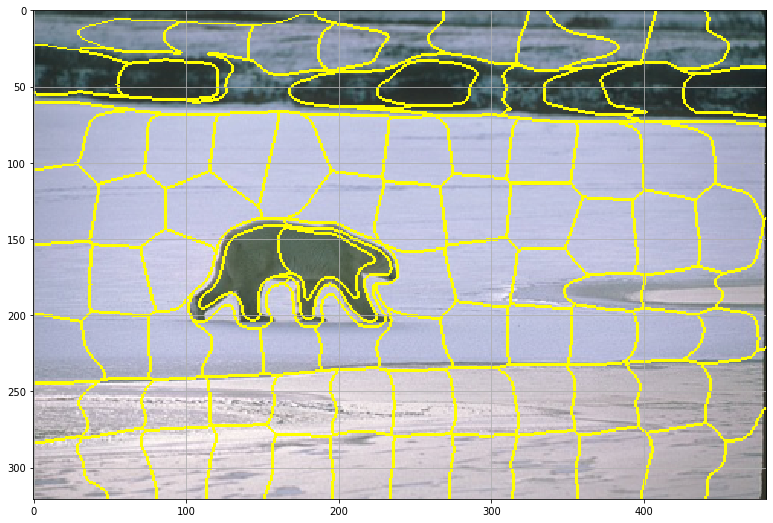

In [5]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('100007.jpg')
image = img_as_float(image)


for numSegments in [100]:
    
    segments = slic(image, n_segments = numSegments, sigma = 5)
    fig = plt.figure(figsize = (17,9))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("on")

plt.grid()
plt.show()

In [6]:
X[:, 3:5][46]

NameError: name 'X' is not defined

In [7]:
def dist(x, y):
    return np.linalg.norm(x - y)

def Laplacian(X):
    n = X.shape[0]
    W = np.zeros((n, n))
    for i in range(0, n):
        for j in range(n):
            if j < i:
                W[i, j] = W[j, i]
            elif j > i:
                W[i, j] = dist(X[i, :], X[j, :])
                
    return np.diag(np.sum(W, axis=1)) - W

In [8]:
from polylabel import polylabel

In [9]:
segments_ids = np.unique(segments)
X = np.zeros((len(segments_ids), 5))
for i in segments_ids:
    coordinates = np.array(np.nonzero(segments==i))
    
    polygon = [[x, y] for x, y in zip(coordinates[0], coordinates[1])]
    center = np.array(polygon[np.random.choice(len(polygon))])
    
    color = np.array(sum([image[x, y] for x, y in zip(coordinates[0], coordinates[1])]))/coordinates.shape[1]
    
    X[i, :] = np.hstack((color.reshape(1, -1), center.reshape(1, -1))).ravel()

In [10]:
L = Laplacian(X)

In [12]:
a = np.zeros((L.shape[0], ))
b = 0
l = -np.ones((L.shape[0], ))
l[46] = 1
u = np.ones((L.shape[0], ))
u[0] = -1
u[1] = -1
x_opt = MPEC_EPM(L, a, b, l, u, options={'maxiter': 20})
np.dot(np.dot(x_opt, L), x_opt)

60640.52661303742

In [13]:
x_opt

array([-1.00000000e+00, -1.00000000e+00, -1.25966083e-05, -4.76074263e-05,
       -5.19625060e-05, -7.52383143e-05, -9.72900928e-05, -3.56631484e-06,
        1.07136720e-05,  4.75146583e-06,  5.80131260e-06, -3.35751423e-05,
       -2.83129567e-05, -3.84699726e-05, -1.22411008e-05, -1.45097038e-05,
       -3.57099849e-05, -6.55227179e-05, -8.46715195e-05, -6.98117641e-05,
       -1.08860518e-04, -3.95109245e-05, -5.31592673e-05, -3.67143722e-05,
       -8.28887987e-05, -5.91421400e-05, -4.46167513e-05, -4.73904287e-05,
       -6.55422735e-05, -8.42214141e-05, -1.08622584e-04, -8.82681407e-05,
       -1.14883851e-04, -7.31513199e-05, -7.86289929e-05, -8.03124369e-05,
       -8.26662713e-05, -8.06391843e-05, -8.36771702e-05, -9.63199413e-05,
       -1.35752153e-04, -1.18927826e-04, -1.23428713e-04, -1.15804212e-04,
       -9.38050238e-05, -1.47582719e-04,  1.00000000e+00, -1.10519450e-04,
       -1.07282172e-04, -1.12108915e-04, -1.09000352e-04, -1.16581774e-04,
       -1.18139511e-04, -

In [37]:
x_opt = SDP_relaxation(L, l, u, options={'maxiter': 10, 'disp': True})
np.dot(np.dot(x_opt, L), x_opt)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1816163.8705197389
            Iterations: 1
            Function evaluations: 95
            Gradient evaluations: 1


1816163.8705197389

In [38]:
x_opt

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1., -1.])